In [176]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import glob

from IPython.display import display

# Packages for custom plot styles
from matplotlib import rc
from matplotlib.gridspec import GridSpec
rc("font", family="serif", size=11)

Would you like to constrain by mass, Y or Z fraction? (enter m/y/z) m
What mass would you like to use? 
Select from 0.8/1.0/1.2/1.4/1.6/1.8: 1.0
Would you like to constrain by mass, Y or Z fraction? (enter m/y/z) z
What initial Z would you like to use? 
Select from -1.2/-0.6/-0.3/-0.15/0.0/0.15: 0.0


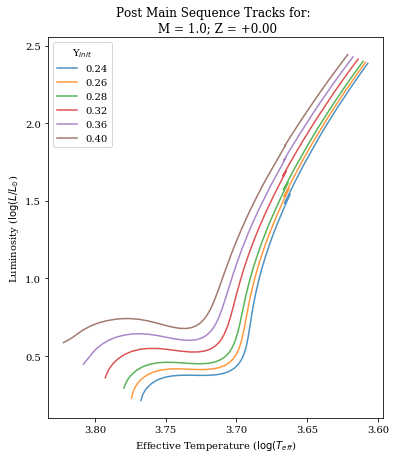

In [182]:
directory = '/home/daniel/Documents/y4project/data/models/'

folders = sorted(os.listdir(directory))
files = [glob.glob(directory + i + '/*.data') for i in folders]
profs = [glob.glob(directory + i + '/*.index') for i in folders]
import itertools
colours = itertools.cycle(('r', 'orange', 'olive', 'teal', 'sienna', 'indigo'))

def questiontime(m,y,z):
    no_qs = 0
    while no_qs < 2:
        cut = input("Would you like to constrain by mass, Y or Z fraction? (enter m/y/z) ")
        if cut == 'm':
            print("What mass would you like to use? ")
            m = input("Select from 0.8/1.0/1.2/1.4/1.6/1.8: ")
            no_qs += 1
        elif cut == 'y':
            print("What initial Y fraction would you like to use? ")
            y = input("Select from 0.24/0.26/0.28/0.32/0.36/0.40: ")
            no_qs += 1
        elif cut == 'z':
            print("What initial Z would you like to use? ")
            z = input("Select from -1.2/-0.6/-0.3/-0.15/0.0/0.15: ")
            no_qs += 1
        else:
            print("Please try again")
            no_qs = 0
    cuts = [m, y, z]
    return cuts

def plotme(label, tit, leg):
        df = pd.read_csv(i[0], skiprows=5, delim_whitespace=True)
        df = df.loc[(df.he_core_mass != 0.0)]
        dg = pd.read_csv(j[0], skiprows=1,
                      names=['model', 'priority', 'profile'], delim_whitespace=True)
        dg = dg.loc[(dg.priority == 1) & (dg.profile == 7)]['model']
        pt = dg.values    
        colour = next(colours)

        plt.plot(df['log_Teff'], df['log_L'], zorder=0,
                 alpha=0.8, label=label)
        plt.legend(title=leg)
        plt.title(tit)
        return

cuts = questiontime('', '', '')
m = cuts[0]
y = cuts[1]
z = cuts[2]

#masses = str(i[0][59:62])
#yinits = str(i[0][64:68])
#zinits = str(i[0][70:75])

plt.figure(1, figsize=(6,7))
for i,j in zip(files, profs):
    if m == '':
        z = '{0:+.2f}'.format(float(z))
        if (str(i[0][64:68]) == y and str(i[0][70:75]) == z):
            label = str(i[0][59:62])
            legtit = (r'Mass ($M_\odot$)')
            tit = (f'Post Main Sequence Tracks for: \n Y = {y}; Z = {z}')
            plotme(label, tit, legtit)            
    elif y == '':
        z = '{0:+.2f}'.format(float(z))
        if (str(i[0][59:62]) == m and str(i[0][70:75]) == z):
            count += 1
            label = str(i[0][64:68])
            legtit = (r'Y$_{init}$')
            tit = (f'Post Main Sequence Tracks for: \n M = {m}; Z = {z}')
            plotme(label, tit, legtit)  
    elif z == '':
        if (str(i[0][59:62]) == m and str(i[0][64:68]) == y):
            label = str(i[0][70:75])
            legtit = (r'Z$_{init}$')
            tit = (f'Post Main Sequence Tracks for: \n M = {m}; Y = {y}')
            plotme(label, tit, legtit)
            
plt.gca().invert_xaxis()
plt.xlabel(r'Effective Temperature ($\log(T_{eff}$)')
plt.ylabel(r'Luminosity ($\log(L/L_{\odot}$)')
#plt.savefig('2702models.png')
plt.show()

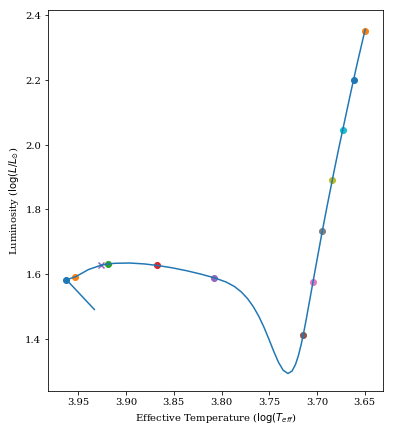

In [178]:
%matplotlib inline
directory = '/home/daniel/Documents/mesa/'
history = directory + 'M1.8_Y0.40_Z+0.15_0219.data'
index = directory + 'M1.8_Y0.40_Z+0.15_0219.index'

for i,j in zip(files, profs):


df = pd.read_csv(history, skiprows=5, delim_whitespace=True)
pts = pd.read_csv(index, skiprows=1,
                  names=['model', 'priority', 'profile'], delim_whitespace=True)
#pts = pts['model']
pts1 = pts.loc[(pts.priority == 1)]['model']
pts2 = pts.loc[(pts.priority == 2)]['model']
#print(pts)

plt.figure(1, figsize=(6,7))
df = df.loc[(df.he_core_mass != 0.0)]
plt.plot(df['log_Teff'], df['log_L'], label='')
for i in pts1:
    label = df.loc[(df.model_number == i)]['log_R'].values
    plt.scatter(df.loc[(df.model_number == i)]['log_Teff'],
                df.loc[(df.model_number == i)]['log_L'],)
for i in pts2:
    label = df.loc[(df.model_number == i)]['log_R'].values
    plt.scatter(df.loc[(df.model_number == i)]['log_Teff'],
                df.loc[(df.model_number == i)]['log_L'], marker='x')
                #label = f'{label[0]:.1f}')
plt.gca().invert_xaxis()
plt.xlabel(r'Effective Temperature ($\log(T_{eff}$)')
plt.ylabel(r'Luminosity ($\log(L/L_{\odot}$)')
#plt.legend()
plt.show()